<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pycaret

In [0]:
import pandas as pd

In [0]:
churn_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [4]:
churn_df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [0]:
from pycaret.classification import *

In [6]:
churn_setup = setup(data = churn_df, target = 'Churn', session_id=3435, ignore_features=['customerID']) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3435
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(7043, 10)"
4,Missing Values,True
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
churn_setup

(      tenure  MonthlyCharges  ...  Contract_Two year  PaperlessBilling_Yes
 0        1.0           29.85  ...                0.0                   1.0
 1       34.0           56.95  ...                0.0                   0.0
 2        2.0           53.85  ...                0.0                   1.0
 3       45.0           42.30  ...                0.0                   0.0
 4        2.0           70.70  ...                0.0                   1.0
 ...      ...             ...  ...                ...                   ...
 7038    24.0           84.80  ...                0.0                   1.0
 7039    72.0          103.20  ...                0.0                   1.0
 7040    11.0           29.60  ...                0.0                   1.0
 7041     4.0           74.40  ...                0.0                   1.0
 7042    66.0          105.65  ...                1.0                   1.0
 
 [7043 rows x 18 columns], 0       0
 1       0
 2       1
 3       0
 4       1
     

In [8]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.799200,0.838900,0.513000,0.656200,0.575700,0.446700
1,Logistic Regression,0.797800,0.832300,0.523700,0.648400,0.579100,0.448000
2,Ada Boost Classifier,0.796100,0.835000,0.521400,0.644600,0.576100,0.443900
3,Gradient Boosting Classifier,0.795300,0.836600,0.512200,0.645100,0.570600,0.438600
4,CatBoost Classifier,0.793300,0.831800,0.509900,0.639500,0.566600,0.433300
5,Ridge Classifier,0.792900,0.000000,0.470200,0.656800,0.547000,0.417500
6,Linear Discriminant Analysis,0.791100,0.826800,0.529000,0.628400,0.573800,0.436800
7,Light Gradient Boosting Machine,0.791100,0.826700,0.516800,0.629300,0.567300,0.431400
8,Random Forest Classifier,0.770800,0.781500,0.449600,0.589100,0.509800,0.363800
9,K Neighbors Classifier,0.770200,0.742000,0.445700,0.589900,0.507200,0.361200


In [9]:
xgb_model=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8073,0.8620,0.5000,0.6842,0.5778,0.4568
1,0.7992,0.8350,0.5154,0.6505,0.5751,0.4459
2,0.7809,0.8241,0.5344,0.5983,0.5645,0.4188
3,0.8012,0.8415,0.5267,0.6571,0.5847,0.4562
4,0.8053,0.8383,0.5191,0.6733,0.5862,0.4617
5,0.8256,0.8598,0.5496,0.7273,0.6261,0.5152
6,0.8012,0.8279,0.4656,0.6854,0.5545,0.4325
7,0.8114,0.8352,0.5267,0.6900,0.5974,0.4771
8,0.7769,0.8216,0.5420,0.5868,0.5635,0.4139
9,0.8053,0.8413,0.5191,0.6733,0.5862,0.4617


In [10]:
tuned_xgb_model=tune_model('xgboost', optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8134,0.8414,0.4923,0.7111,0.5818,0.4668
1,0.7951,0.8231,0.5000,0.6436,0.5628,0.4317
2,0.7850,0.8253,0.5115,0.6147,0.5583,0.4178
3,0.8053,0.8420,0.5420,0.6636,0.5966,0.4700
4,0.7890,0.8287,0.5420,0.6174,0.5772,0.4375
5,0.8235,0.8402,0.5420,0.7245,0.6201,0.5082
6,0.7830,0.8090,0.4275,0.6364,0.5114,0.3787
7,0.7911,0.8345,0.4809,0.6429,0.5502,0.4178
8,0.7586,0.8101,0.4504,0.5566,0.4979,0.3413
9,0.7951,0.8296,0.4885,0.6531,0.5590,0.4291


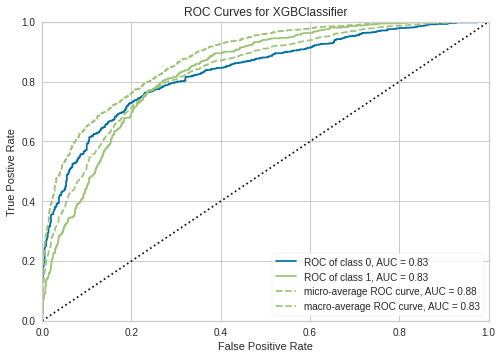

In [11]:
plot_model(tuned_xgb_model, plot = 'auc')

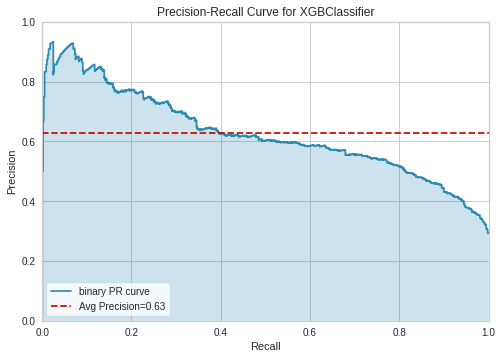

In [12]:
plot_model(tuned_xgb_model, plot = 'pr')

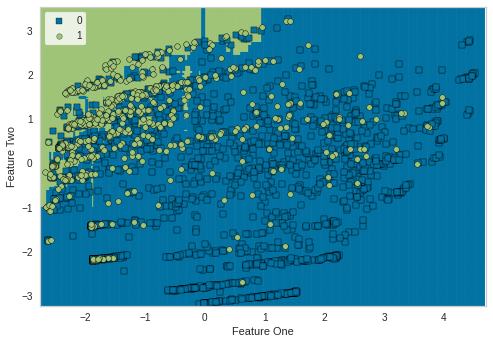

In [13]:
plot_model(tuned_xgb_model, plot = 'boundary')

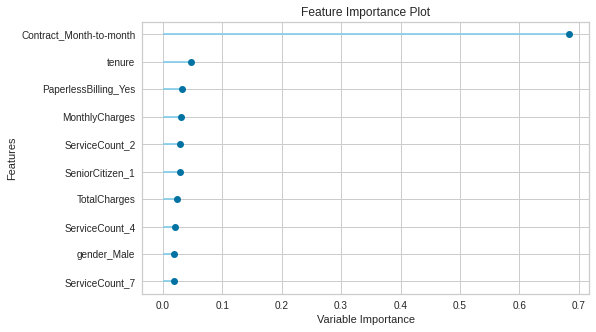

In [14]:
plot_model(tuned_xgb_model, plot='feature')


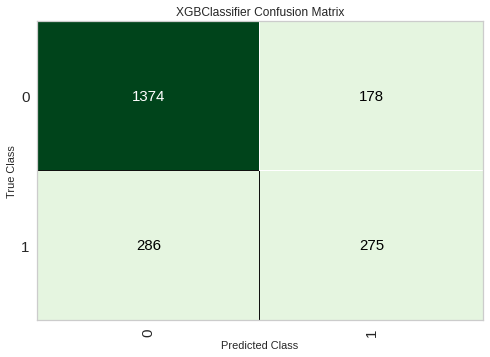

In [15]:
plot_model(tuned_xgb_model, plot = 'confusion_matrix')

In [16]:
predict_model(tuned_xgb_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.7804,0.8341,0.4902,0.6071,0.5424,0.4001


,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,ServiceCount_1,ServiceCount_2,ServiceCount_3,ServiceCount_4,ServiceCount_5,ServiceCount_6,ServiceCount_7,ServiceCount_8,ServiceCount_9,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn,Label,Score
0,2.0,30.90,59.05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.6503
1,72.0,19.80,1414.65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.1351
2,42.0,100.40,4303.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.2218
3,1.0,20.05,20.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.4089
4,1.0,90.60,90.60,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0.7146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,72.0,79.50,5661.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0,0.1361
2109,14.0,59.10,772.85,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.1889
2110,31.0,76.05,2227.80,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.4424
2111,27.0,56.15,1439.35,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.2018


In [0]:
xgb_final = finalize_model(tuned_xgb_model)

In [18]:

xgb_final

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.14, max_delta_step=0, max_depth=10,
              min_child_weight=2, missing=None, n_estimators=10, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=3435,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=0)

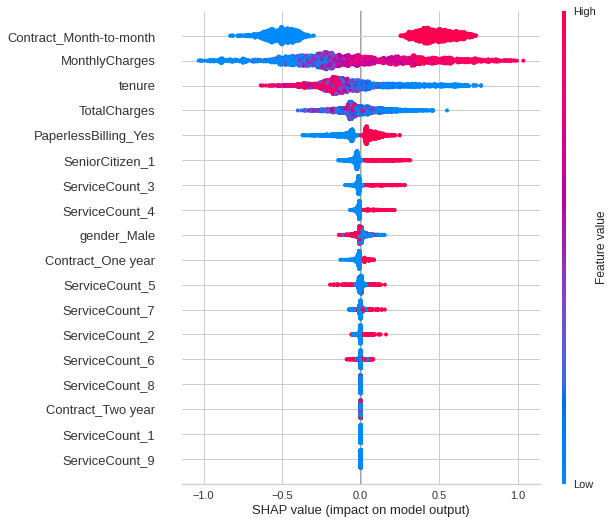

In [19]:
interpret_model(tuned_xgb_model)

In [0]:
interpret_model(tuned_xgb_model, plot='correlation')

In [20]:
save_model(tuned_xgb_model,'xgb_model')

Transformation Pipeline and Model Succesfully Saved


In [21]:
!ls

catboost_info  sample_data  xgb_model.pkl


In [22]:
load_xgb = load_model('xgb_model')

Transformation Pipeline and Model Sucessfully Loaded


In [23]:
load_xgb

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Cata...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()), ('dummy', Dummify(target='Churn')),
                 ('fix_perfect', Remove_100(target='Churn')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.14, max_delta_step=0, max_depth=10,
               min_child_weight=2, missing=nan, n_estimators=10, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=3435,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.3, verbosity=0)]

In [24]:
evaluate_model(tuned_xgb_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…